In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/mushrooms.csv')

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
X = df.drop('class',axis=1)

In [7]:
X = pd.get_dummies(X,drop_first=True)

In [8]:
y = df['class']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {'n_estimators':[50,100], 'learning_rate':[0.1,0.05,0.2], 'max_depth':[3,4,5]}

In [18]:
gb_model = GradientBoostingClassifier()

In [19]:
grid = GridSearchCV(gb_model,param_grid)

In [20]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [21]:
from sklearn.metrics import classification_report, accuracy_score

In [22]:
predictions = grid.predict(X_test)

In [23]:
grid.best_estimator_

GradientBoostingClassifier()

In [24]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [28]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 2.31772038e-16, 0.00000000e+00, 0.00000000e+00,
       9.11743695e-17, 1.04902579e-03, 0.00000000e+00, 1.27734798e-06,
       8.12978520e-19, 1.14445052e-17, 1.00688561e-17, 0.00000000e+00,
       5.52626293e-17, 0.00000000e+00, 0.00000000e+00, 7.74665739e-05,
       2.31213349e-03, 5.15972859e-02, 1.84253604e-04, 1.40188063e-02,
       1.82499853e-02, 3.23193539e-03, 6.14744334e-01, 5.61116517e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.25092906e-02,
       1.04355233e-02, 0.00000000e+00, 5.75784448e-17, 1.71426098e-17,
       1.96578986e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.32013911e-04, 1.70638552e-06, 1.35970285e-01, 3.02822984e-03,
       9.26984962e-03, 4.47043435e-04, 6.65594939e-05, 4.95063766e-06,
       3.60117275e-05, 8.10118794e-04, 5.88953036e-02, 1.09094784e-05,
       0.00000000e+00, 0.00000000e+00, 6.76478844e-04, 0.00000000e+00,
      

In [29]:
feat_import = grid.best_estimator_.feature_importances_

In [30]:
imp_features = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [33]:
imp_features = imp_features[imp_features['Importance']>0.0005]

In [38]:
imp_features = imp_features.sort_values('Importance')

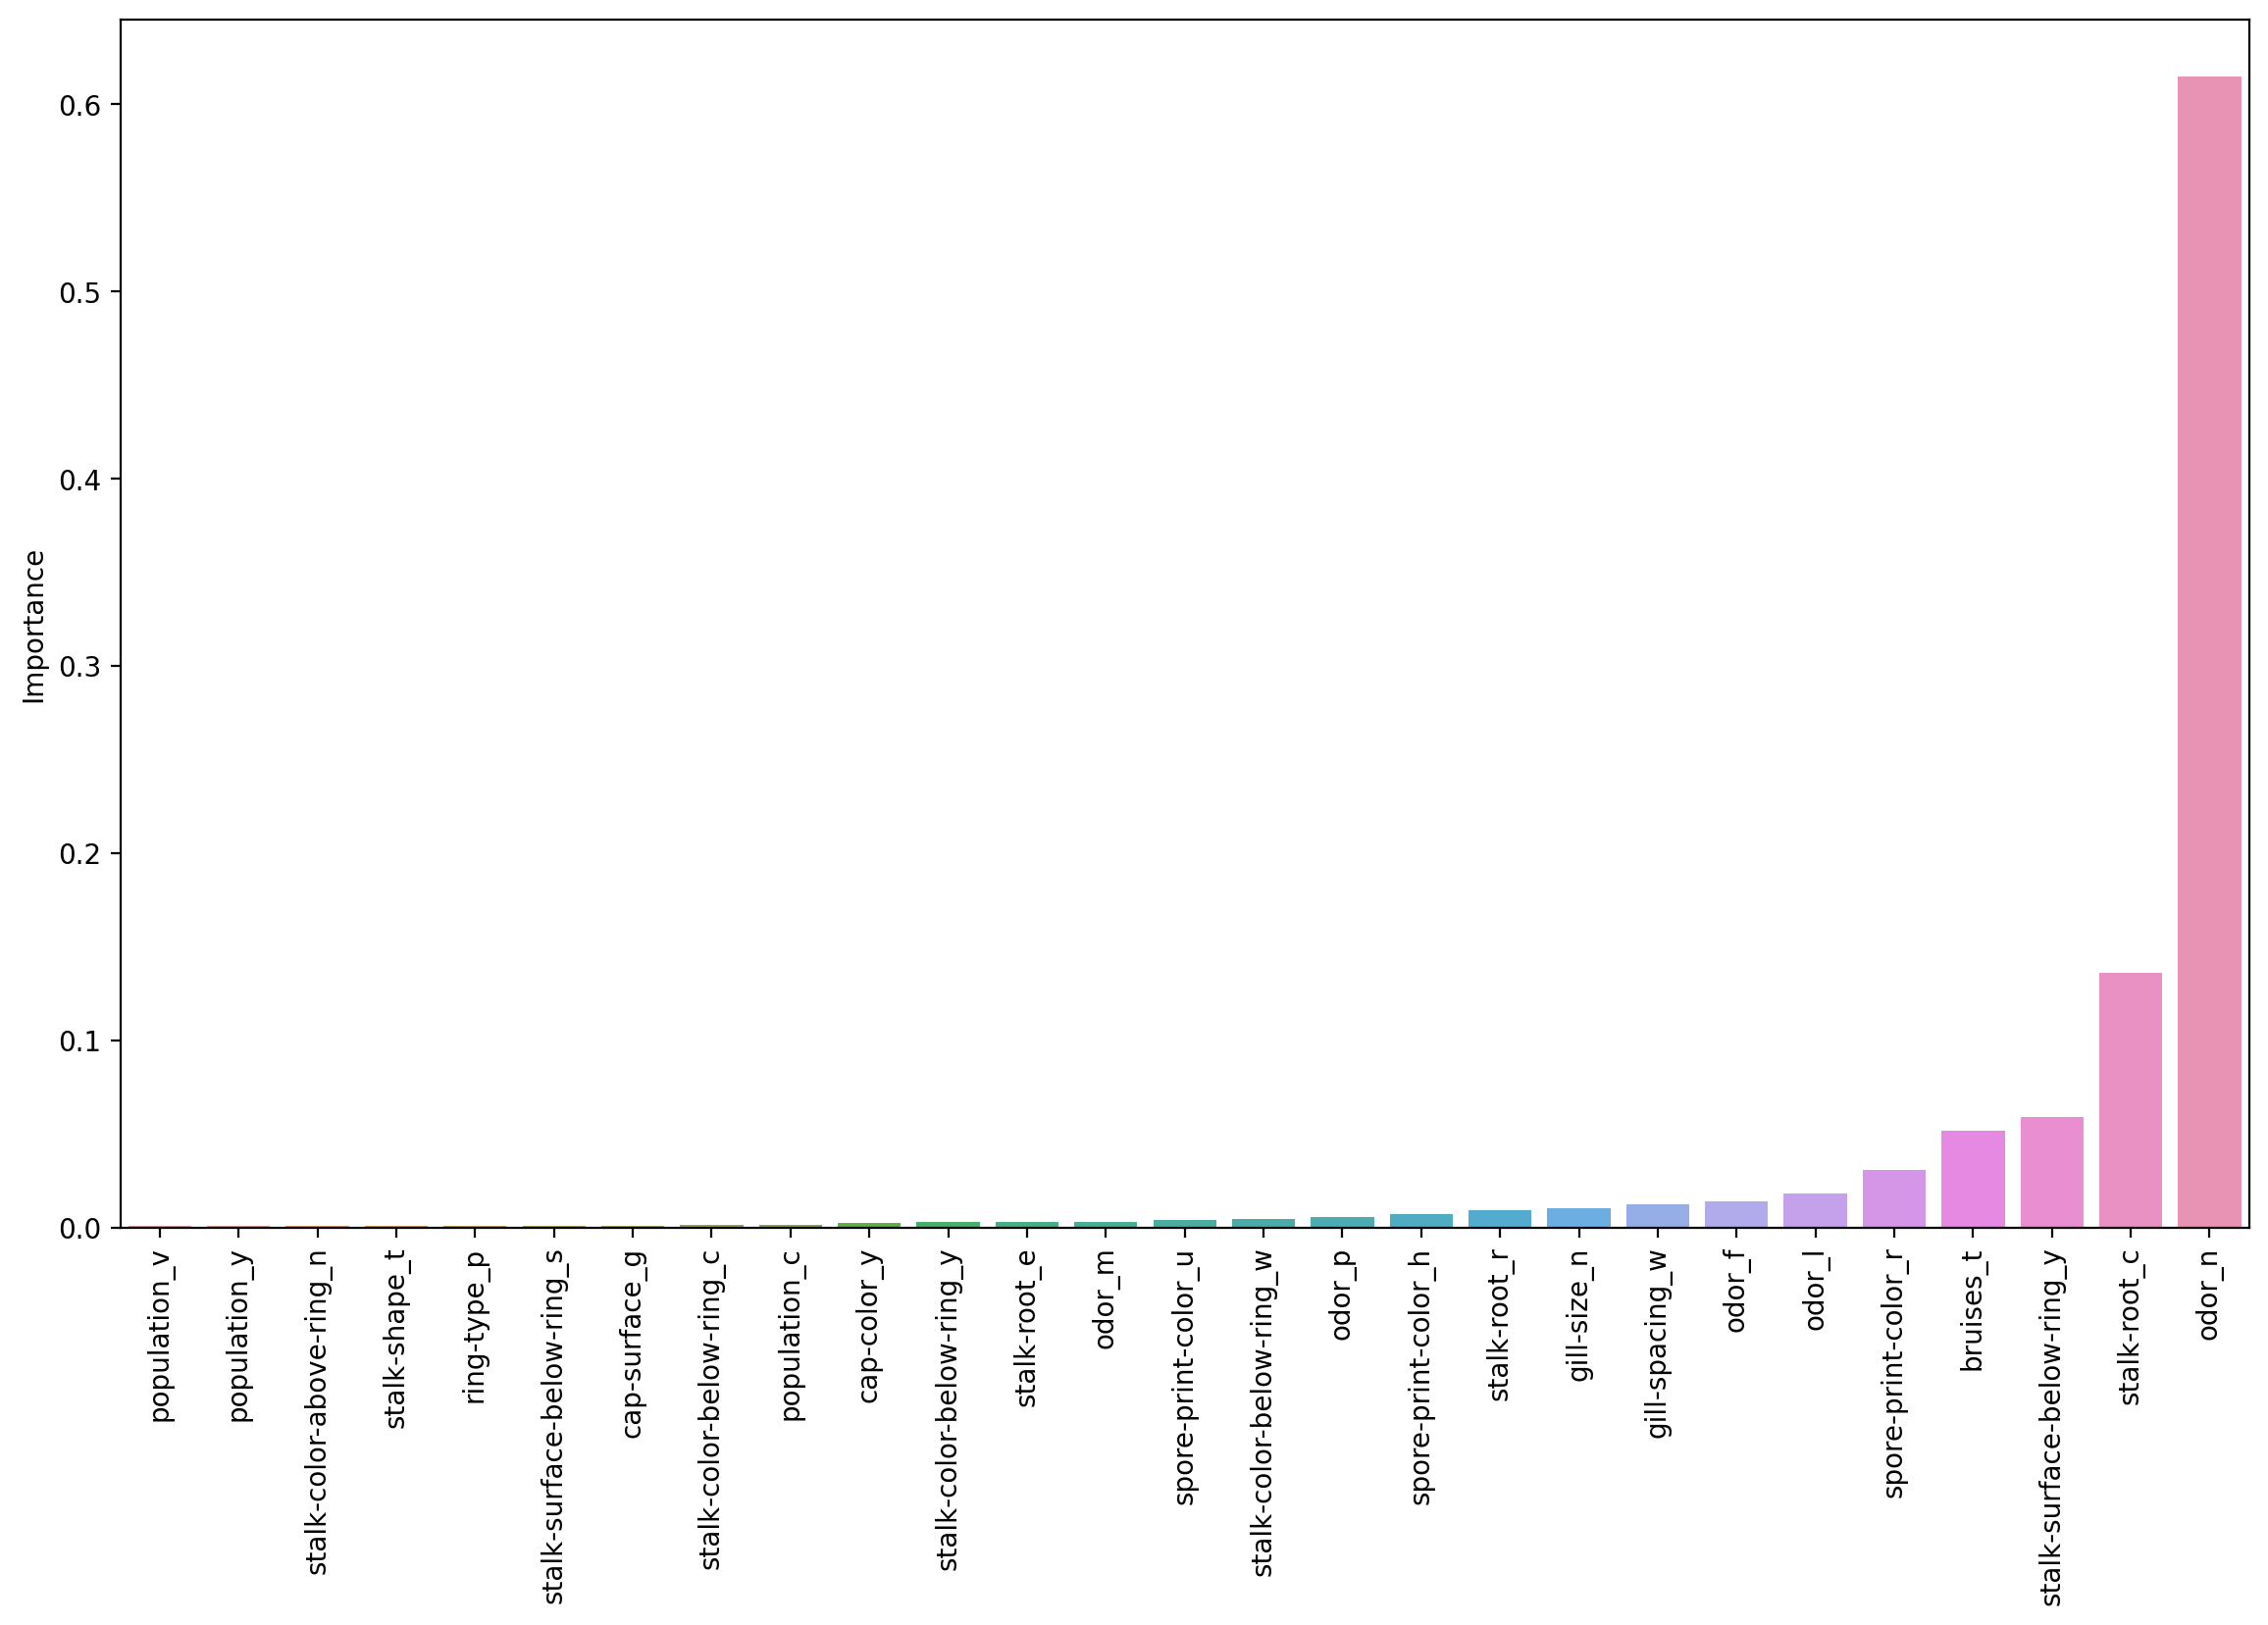

In [40]:
plt.figure(figsize=(14,8),dpi=200)
sns.barplot(data=imp_features,x=imp_features.index,y='Importance')
plt.xticks(rotation=90);